In [86]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [87]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


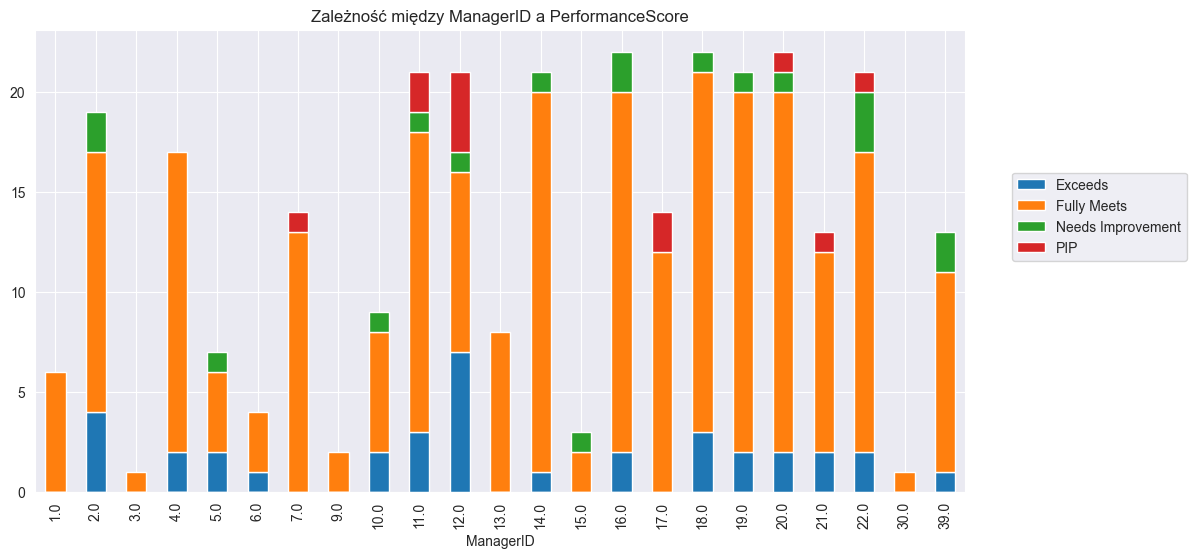

In [88]:
df_grouped = df.groupby(['ManagerID', 'PerformanceScore']).size().reset_index().pivot(columns='PerformanceScore',
                                                                                      index='ManagerID', values=0)
df_plot = df_grouped.plot(kind='bar', stacked=True, legend=True, figsize=(12, 6),
                          title='Zależność między ManagerID a PerformanceScore')
df_plot.legend(loc=(1.05, 0.50))
plt.show()

Dane w przypadku części menadżerów są zdecydowanie niewystarczające (np. dla menadżera o ID 3, 5, 6, 9, 15, 30), żeby zaobserwować, jakąkolwiek tendencję czy zależność. Różnice pomiędzy ilością pracowników przydzielonych do poszczególnych menadżerów są także ogromne (nawet do 2200% pracowników różnicy), mimo to warto zauważyć, iż część menadżerów (np. 4, 14, 18, 19) mimo przydzielonej większej ilości pracowników mają arbitralnie mniej pracowników wymagających poprawy oraz brak takowych niespełniających wymagań (4 nawet nie posiada żadnego pracownika tych dwóch kategorii).
Warto też zauważyć, że żaden z menadżerów posiadających mniej niż 10 pracowników nie posiada pracownika niespełniającego oczekiwań.

Podsumowując: nie wykluczyłbym zależności między konkretnym menadżerem a wynikami przydzielonych mu do nadzoru pracowników, jednakże rozpatrując tylko dane, które zostały mi dostarczone taka tendencja jednoznacznie nie występuje.

Do bezapelacyjnego potwierdzenia lub obalenia tej hipotezy potrzebowałbym większej ilości danych (najlepiej zestawienie tych samych menadżerów nadzorujących różne grupy pracowników).

Addendum: Ciekawym przypadkiem jest menadżer o id 12 - posiada on największą ilość pracowników, którzy 
przekraczają oczekiwania, ale i największą ilość pracowników, którzy nie spełniają oczekiwań. Można by postawić hipotezę, że menadżer, mimo iż 
nadwyraz kompetentny skupia swoją uwagę na wąskiej grupie pracowników lub została przydzielona mu zbyt duża ilość pracowników do nadzorowania, co skutkuje takimi wynikami.

In [89]:
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'])
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])
df['DateofTermination'].head()

C:\Users\JP\AppData\Local\Temp\ipykernel_11224\736927992.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])


0          NaT
1          NaT
2          NaT
3   2015-04-15
4          NaT
Name: DateofTermination, dtype: datetime64[ns]

In [90]:
df['DaysEmployed'] = (df['DateofTermination'].fillna(pd.to_datetime('now')) - df['DateofHire']).dt.days
df['DaysEmployed'].head()

0    5552.0
1    3655.0
2    3389.0
3      58.0
4    3175.0
Name: DaysEmployed, dtype: float64

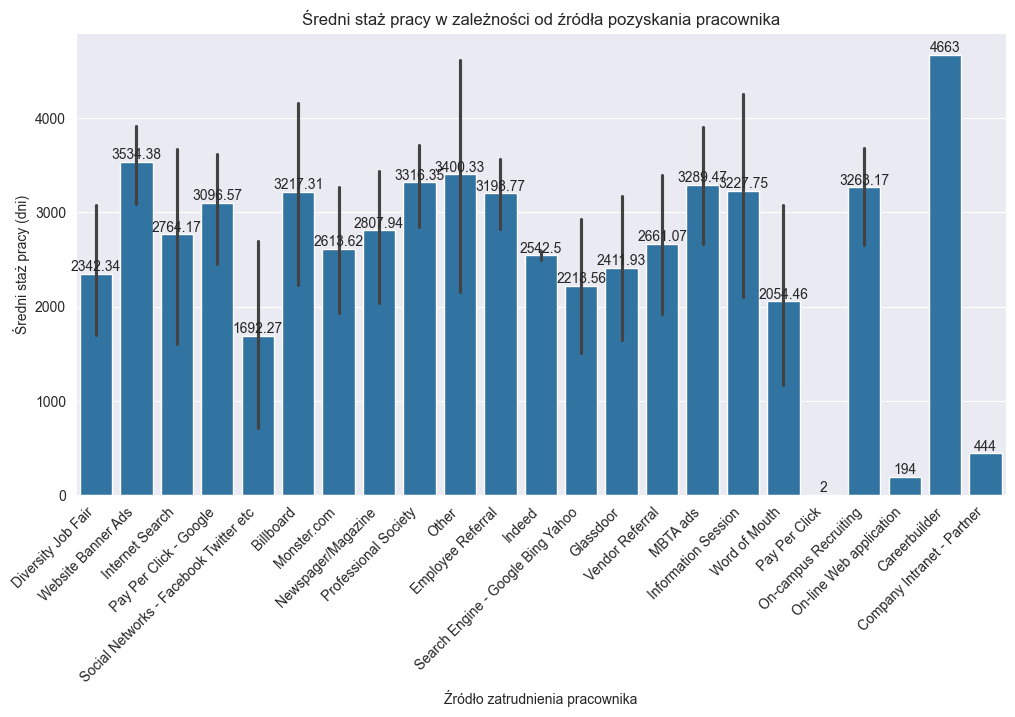

In [91]:
plt.figure(figsize=(12, 6))
sns.barplot(x='RecruitmentSource', y='DaysEmployed', data=df, estimator='mean')
plt.xticks(rotation=45, ha='right')
plt.title('Średni staż pracy w zależności od źródła pozyskania pracownika')
plt.xlabel('Źródło zatrudnienia pracownika')
plt.ylabel('Średni staż pracy (dni)')
plt.bar_label(plt.gca().containers[0])
plt.show()

Warto wyróżnić pracowników którzy jako źródło informacji o ofercie pracy zgłosili bilbord oraz 'other' - to oni mają średnio najdłuższe staże, warto także rozpatrzeć możliwość zatrudniena większej ilości pracowników przez "Careerbuilder" jedyny pracownik, który zgłosił tę formę jako źródło informacji o ofercie pracy, jest jednym z paru pracowników z najdłuższym stażem.
Addendum: zdecydowanie pod tym względem należy unikać zatrudnienia pracobiorców zatrudnionych za pomocą "Pay per Click", "Company Intranet - Partner", "On-line Web application" oraz "Indeed" - ich średni staż pracy jest najkrótszy.

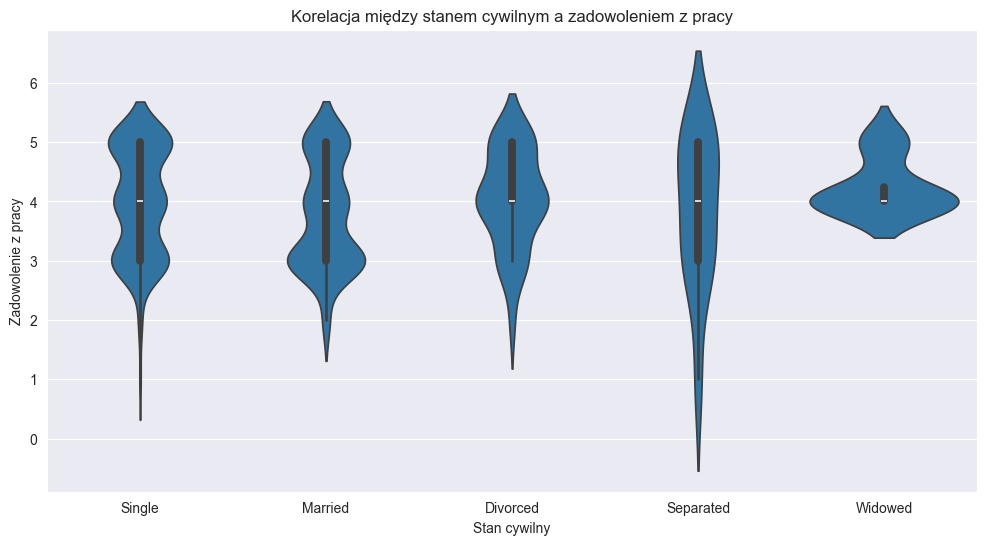

In [92]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='MaritalDesc', y='EmpSatisfaction', data=df,
               order=['Single', 'Married', 'Divorced', 'Separated', 'Widowed'])
plt.title('Korelacja między stanem cywilnym a zadowoleniem z pracy')
plt.xlabel('Stan cywilny')
plt.ylabel('Zadowolenie z pracy')
medians = df.groupby('MaritalDesc')['EmpSatisfaction'].median().values
plt.show()

Jak widzimy stan cywilny pracownika koreluje z zadowolniem pracownika mimo iż mediana zadowolenia wszystkich pracowników jest taka sama bez względu na ich stan cywilny.
Wszystkie wdowy są zadowolone z pracy w powyżej średnim stopniu mała ich część wykazuje nieznacznie większe zadowolnie.
Osoby po separacji mają największą różnorodność odpowiedzi część z nich jest absolutnie niezadowolona z pracy, część jest niezwykle zadowolona.
Osoby po rozwodzie jak i osoby w stosunku małżeńskim nie przejawiają żadnych aberracji w zadowoleniu z pracy.
Generalnie osoby samotne tak samo jednakże warto zauważyć iż występują pojedyncze przypadki osób niezwykle niezadowolonych z pracy.

In [111]:
df['DOB'] = pd.to_datetime(df['DOB'])
now = pd.to_datetime('now')
df['Age'] = (now - df['DOB']).astype('<m8[ns]')
df['Age'] = abs(df['Age'].dt.days / 365)
df['Age']

0      36.150685
1      39.731507
2      37.380822
3      38.339726
4      35.665753
         ...    
396          NaN
397          NaN
398          NaN
399          NaN
400          NaN
Name: Age, Length: 401, dtype: float64

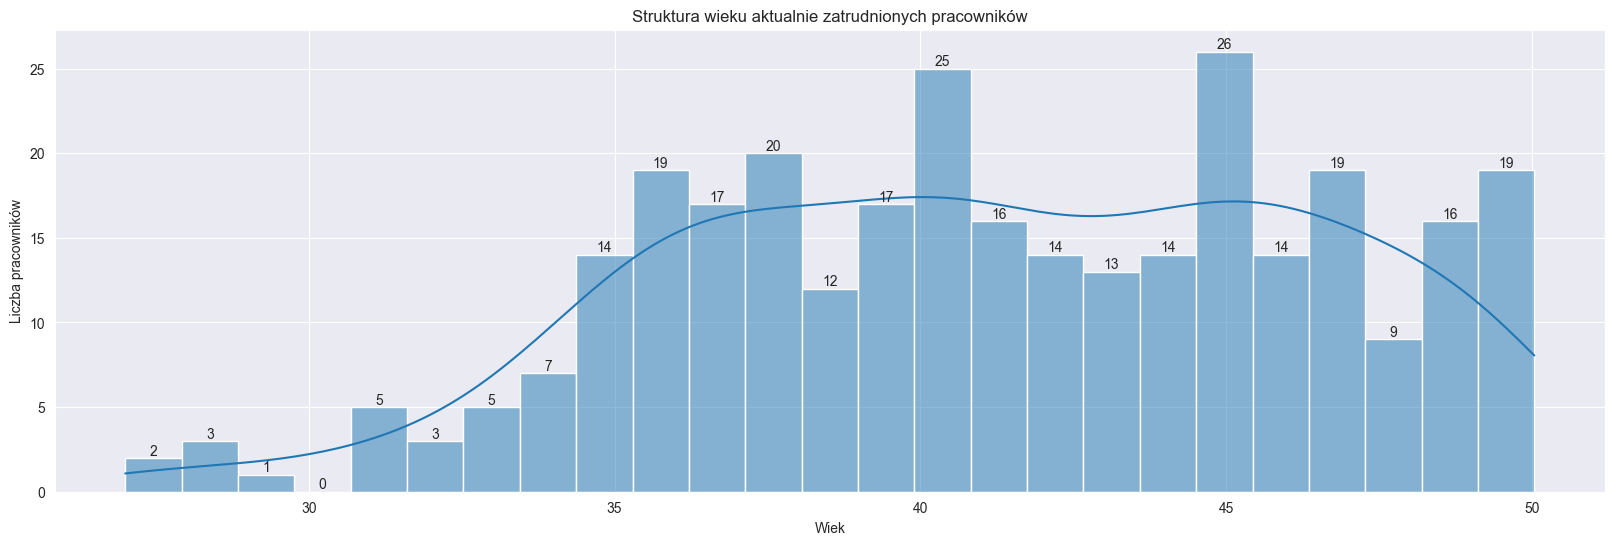

In [120]:
plt.figure(figsize=(20, 6))
sns.histplot(df['Age'], bins=25, kde=True)
plt.title('Struktura wieku aktualnie zatrudnionych pracowników')
plt.xlabel('Wiek')
plt.ylabel('Liczba pracowników')
plt.bar_label(plt.gca().containers[0])
plt.show()

Jak widzimy największą grupę pracowników stanowią osoby w wieku 35-46 lat, najmniejszą zaś osoby poniżej 35 roku życia.

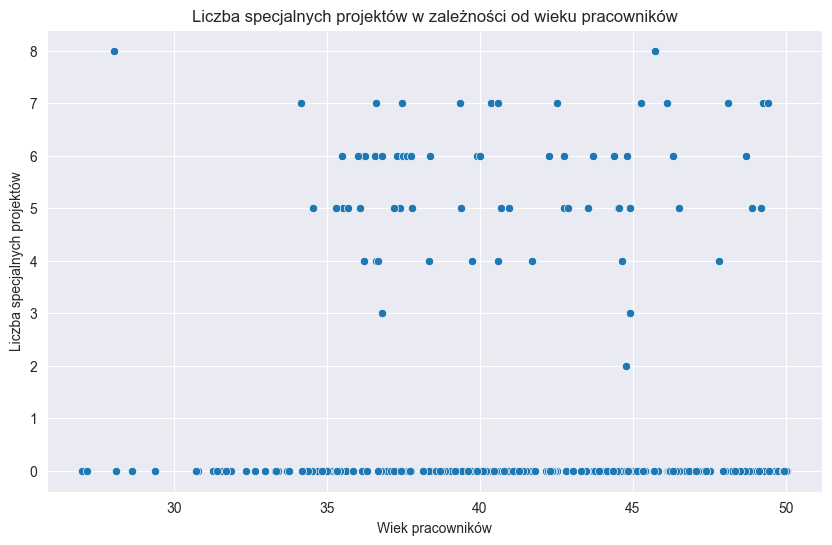

In [125]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='SpecialProjectsCount', data=df)
plt.title('Liczba specjalnych projektów w zależności od wieku pracowników')
plt.xlabel('Wiek pracowników')
plt.ylabel('Liczba specjalnych projektów')
plt.show()

Właściwie dopiero po 35 roku życia pracownicy zaczynają być przydzielani do specjalnych projektów, więc tak Ci młodsi (z dosłownie trzema wyjatkami) nie mają żadnych specjalnych projektów, ergo tak pracują nad mniejszą ilością projektów niż ich starsi koledzy. Jednakże po przekroczeniu 35 roku życia ilość specjalnych projektów nie zależy od wieku pracownika.